In [186]:
library(tidyverse)
library(dplyr)
library(ggplot2)

## 1)  Data Description:

In [187]:
players<- read_csv("players (2).csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [188]:
nrow(players)
ncol(players)
names(players)

experience_players<- players |>
  group_by(experience) |>
  summarise(
    mean_played_hours = mean(played_hours, na.rm = TRUE),
    mean_age = mean(Age, na.rm = TRUE),
    number_of_obs = n())
experience_players

summary_age <- players |>
  summarise(age_mean = mean(Age, na.rm = TRUE),
  played_hours_mean = mean(played_hours, na.rm = TRUE),
            age_min = min(Age, na.rm=TRUE),
            age_max = max(Age, na.rm = TRUE))
summary_age

summary_played <- players |>
  summarise(played_hours_mean = mean(played_hours, na.rm = TRUE),
  played_hours_mean = mean(played_hours, na.rm = TRUE),
            played_hours_min = min(played_hours, na.rm=TRUE),
            played_hours_max = max(played_hours, na.rm = TRUE))
summary_played

sub_players<- players |>
  group_by(subscribe) |>
  summarise(
    mean_played_hours = mean(played_hours, na.rm = TRUE),
    mean_age = mean(Age, na.rm = TRUE),
    number_of_obs = n())
sub_players

gender_players<- players |>
  group_by(gender) |>
  summarise(
    mean_played_hours = mean(played_hours, na.rm = TRUE),
    mean_age = mean(Age, na.rm = TRUE),
    number_of_obs = n())
gender_players

summary <- players |>
  summarise(age_mean = mean(Age, na.rm = TRUE),
  played_hours_mean = mean(played_hours, na.rm = TRUE),
            age_min = min(Age, na.rm=TRUE),
            age_max = max(Age, na.rm = TRUE),
played_hours_mean = mean(played_hours, na.rm = TRUE),
  played_hours_mean = mean(played_hours, na.rm = TRUE),
            played_hours_min = min(played_hours, na.rm=TRUE),
            played_hours_max = max(played_hours, na.rm = TRUE))
summary

[1] 196

[1] 7

[1] "experience"   "subscribe"    "hashedEmail"  "played_hours" "name"        
[6] "gender"       "Age"

experience,mean_played_hours,mean_age,number_of_obs
<chr>,<dbl>,<dbl>,<int>
Amateur,6.0174603,21.36508,63
Beginner,1.2485714,21.65714,35
Pro,2.6000000,16.92308,14
Regular,18.2083333,22.02857,36
Veteran,0.6479167,20.95833,48


age_mean,played_hours_mean,age_min,age_max
<dbl>,<dbl>,<dbl>,<dbl>
21.13918,5.845918,9,58


played_hours_mean,played_hours_min,played_hours_max
<dbl>,<dbl>,<dbl>
5.845918,0,223.1


subscribe,mean_played_hours,mean_age,number_of_obs
<lgl>,<dbl>,<dbl>,<int>
FALSE,0.5019231,23.7500,52
TRUE,7.7756944,20.1831,144


gender,mean_played_hours,mean_age,number_of_obs
<chr>,<dbl>,<dbl>,<int>
Agender,6.25000000,23.50000,2
Female,10.63513514,21.81081,37
Male,4.12741935,20.85484,124
Non-binary,14.88000000,19.06667,15
Other,0.20000000,NaN,1
Prefer not to say,0.37272727,25.00000,11
Two-Spirited,0.08333333,20.00000,6


age_mean,played_hours_mean,age_min,age_max,played_hours_min,played_hours_max
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.13918,5.845918,9,58,0,223.1


### Players Data Set

- **Observations**: 196
- **Variables**: 7 
    - 'experience','subscribe','hashedEmail','played_hours','name','gender','Age'
        - **experience**: 5 types of experiences
            - 'Amateur', ' Beginner', 'Pro', 'Regular', 'Veteran'
        - **Age**: average is 21, max is 58, min is 
        - **Played hours**: average is 5.85 hours, max is 223.1 hours
        - **hashedEmail**: is a the unique way to adress each person
        - **Subscribed**: people who were subscribed to gameing played and average of 7.27 more hours
        - **Gender**: there are 7 catagorys of gender
            - 'Agender', 'Female', 'Male', 'Non-bonary', 'Other', 'Two-Spirited','Prefer not to say'
            - majority were male, non-binary people played the most, highest mean age was of those who did not specify gender
- **Issues**:
    - There are many people who did not play at all and still have a profile; this may affect the distribution and data analaysis. However, it can solved by filtering those individuals out.
    - There are many columns with NA as a value, this will definately distube our imformtion but can be solved using na.rm=TRUE


In [189]:
sessions<- read_csv("sessions (2).csv")

tidy_sessions<- sessions|>
separate(start_time, c("start_date", "start_time"), " ")|>
separate(end_time, c("end_date", "end_time"), " ")

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [190]:
nrow(sessions)
ncol(sessions)
names(sessions)

time<- tidy_sessions|>
summarise(start_time_mean = mean(original_start_time, na.rm = TRUE),
  end_time_mean = mean(original_end_time, na.rm = TRUE))
time


[1] 1535

[1] 5

[1] "hashedEmail"         "start_time"          "end_time"           
[4] "original_start_time" "original_end_time"

start_time_mean,end_time_mean
<dbl>,<dbl>
1.719201e+12,1.719196e+12


### Sessions Data Set

- **Observations**: 1535
- **Variables**: 5
    - 'hashedEmail', 'start_time', 'end_time', 'original_start_time', 'original_end_time'
    - Most of these variables are characters so you can't find numerical summaries of them easily
    - Orignal start time and end time are in UNIX time, so to convert it into readable form you much do some steps.
- **Issues**:
    - The start_time and end_time are not in tidy form because one variable has both data and time, so I used separate() to split the columns into two so we have in total 7 columns now.
    - Most of the columns are in character format so it is difficult to summarize the data.
        - I can only use original end and start time, which are in milliseconds. 

## 2) Questions:

**Broad Question**: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific Question**: Can age, and hours played predict whether they subscribe to game related newsletter in players.csv, and will this change depending on experience level?

**How the data will help answer this question**: In the players.csv data, there are variables related to both player demographic and game usage. Using the variables 'Age' and 'played_hours', I can predict which kind of people are most likely to subscribe to game-related newsletters using classification. Furthermore, I can separate the data using experience levels to check if there are any trends within different levels of expertise. 

**How will I wrangle the data**:

1) *Load*:
    - load player.csv into my notebook
3) *Select and Clean*: select only the necessary columns such as Age, played_hours, experience, and subscribe
   - Ensure data is usable by filtering out NA values and invalid observations (ex. 0 hours played)
4) *Data Analysis and Visualizations*:
   -  Make a scatter plot of Age vs Played_hours, with the subscription variable coloured
        - This is to find a general trend of Age and Played_hours
   - Facet 'experience' to see if the pattern is different for each player type
        - This way I can compare the trends between different experiences and how they differ from the general trend as well.
6) *Classification*:
     - Check for imbalance in data (compare the amount of subscribed to not subscribed)
   - I can also use the general data set to make a classification model to check if age and played_hours true is able to detect if a person subscribes or not.


## 3)  Exploratory Data Analysis and Visualization

Demonstrate that the dataset can be loaded into R.

- Do the minimum necessary wrangling to turn your data into a **tidy format**. 
    - Do not do any additional wrangling here; that will happen later during the group project phase.
- Compute the **mean value** for each quantitative variable in the players.csv data set. Report the mean values in a **table format**.
- Make a **few exploratory visualizations** of the data to help you understand it. (2 graphs)
- Use our visualization best practices to make high-quality plots (make sure to include labels, titles, units of measurement, etc)
- Explain any insights you gain from these plots that are relevant to address your question

In [191]:
players<- read_csv("players (2).csv")
# players (2).csv is the same as players.csv I have just downlodaded it twice and therefor it shows the (2)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [207]:
tidy_players<- players |>
mutate(subscribe = as_factor(subscribe),
      experience = as_factor(experience))|>
filter(played_hours>0.0)|>
filter(!is.na(Age))
tidy_players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47
Veteran,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23
Beginner,TRUE,4bed6f49b672974f706aa7f020b4f29020326bf594520593557cd381a51559b8,1.5,Sarah,Female,25
Amateur,TRUE,3caa832978e0596779f4ee7c686c4592fb6de893925025d25bf26be9a8cd03f5,0.2,Thatcher,Male,22
Amateur,TRUE,a175d4741dc84e6baf77901f6e8e0a06f54809a34e6b5211159bced346f7fb3e,48.4,Xander,Female,17


The players.csv data is already quite tidy with one variable in every column, one observation in every row, and one value per cell. Therefore, I have just removed the NA/invalid values and turned experience and subscribe into factors because they are categorical values and this would make it easier to make graphs.

In [208]:
players|>
summarise(age_mean = round(mean(Age,na.rm=TRUE),2),
         played_hours_mean = round(mean(played_hours,na.rm=TRUE), 2))

age_mean,played_hours_mean
<dbl>,<dbl>
21.14,5.85


In [209]:
tidy_players|>
summarise(age_mean = round(mean(Age,na.rm=TRUE),2),
         played_hours_mean = round(mean(played_hours,na.rm=TRUE), 2))

age_mean,played_hours_mean
<dbl>,<dbl>
21.3,10.51


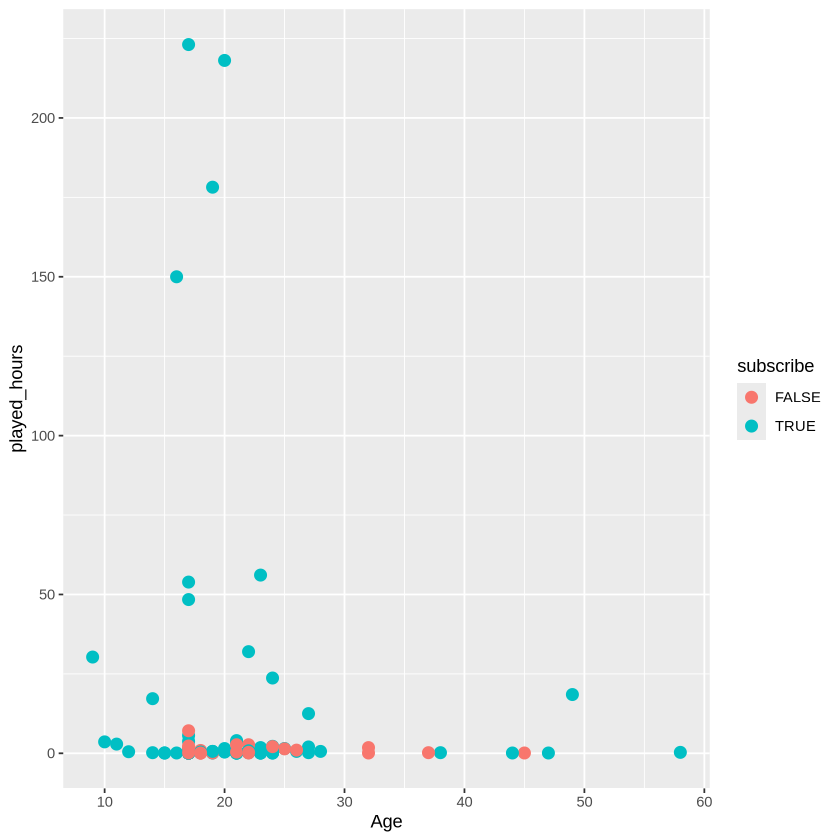

In [216]:
plot_1<- tidy_players|>
ggplot(aes(x=Age, y=played_hours, colour=subscribe))+
geom_point(size=3)
plot_1

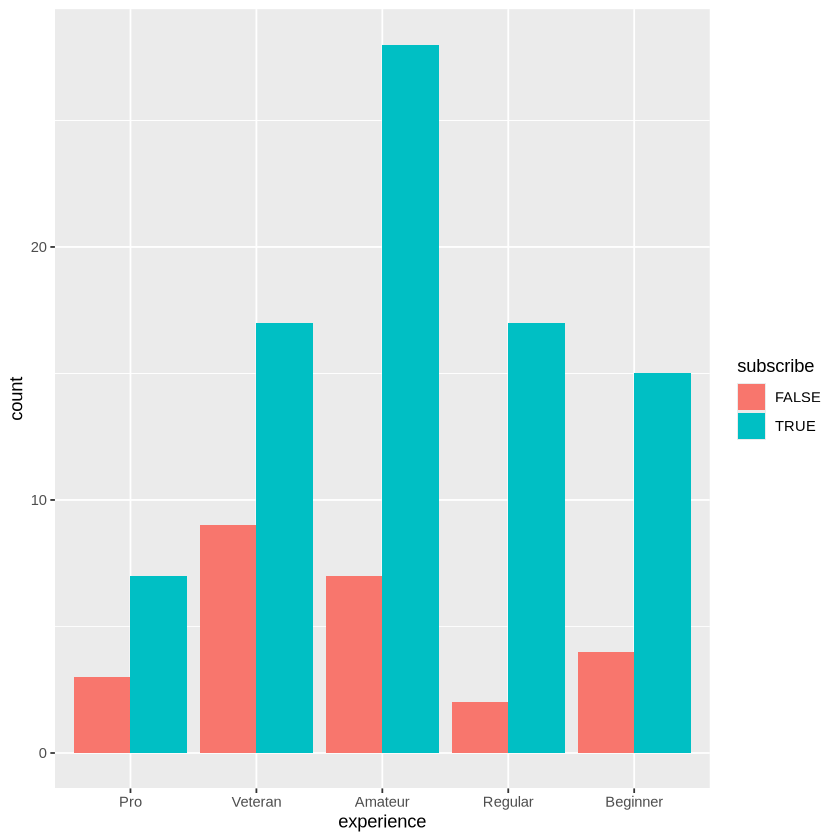

In [215]:
plot_2<- tidy_players|>
ggplot(aes(x=experience, fill=subscribe))+
geom_bar(position= "dodge")
plot_2